# 📊 Analiza i wizualizacja danych z czujników
Ten notebook analizuje dane z czujników zapisane w plikach CSV. Wykorzystuje biblioteki **Pandas**, **NumPy**, **SciPy** i **Matplotlib** do przetwarzania, analizy statystycznej i wizualizacji.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from datetime import datetime, timedelta

%matplotlib inline

## 📥 Wczytanie danych z plików CSV

In [5]:
# Folder z logami
log_folder = "logs"

# Sprawdzenie czy folder istnieje
if not os.path.exists(log_folder):
     print(f"Folder '{log_folder}' nie istnieje. Upewnij się, że dane są zapisane w katalogu 'logs/'.")
else:
    # Pobranie listy plików CSV
    csv_files = [f for f in os.listdir(log_folder) if f.endswith('.csv')]

    if not csv_files:
        print(f"Folder '{log_folder}' nie zawiera żadnych plików CSV.")
    else:
        # Wczytanie i połączenie danych
        data_frames = []
        for file in csv_files:
            file_path = os.path.join(log_folder, file)
            try:
                df = pd.read_csv(file_path, sep=';')
                data_frames.append(df)
            except Exception as e:
                print(f"Błąd podczas wczytywania pliku {file}: {e}")

        if data_frames:
            data = pd.concat(data_frames, ignore_index=True)
            # Konwersja timestamp
            data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
            data = data.dropna(subset=['timestamp'])
            # Grupowanie po sensor_id
            sensors = data['sensor_id'].unique()
            for sensor in sensors:
                sensor_data = data[data['sensor_id'] == sensor].sort_values('timestamp')


## 📈 Statystyki opisowe

In [6]:
data.describe(include='all')

,timestamp,sensor_id,value,unit
count,144,144,144.000000,144
unique,NaN,4,NaN,5
top,NaN,temp_1,NaN,%
freq,NaN,36,NaN,36
mean,2025-06-05 12:09:49.013140480,NaN,277.754306,NaN
min,2025-05-28 13:44:38.233959,NaN,-13.200000,NaN
25%,2025-06-06 20:50:47.026576384,NaN,17.505000,NaN
50%,2025-06-07 21:47:38.174315008,NaN,50.790000,NaN
75%,2025-06-07 22:23:46.458530560,NaN,331.225000,NaN
max,2025-06-07 22:24:09.523719,NaN,1031.440000,NaN


## 📉 Wykresy trendów dla każdego czujnika

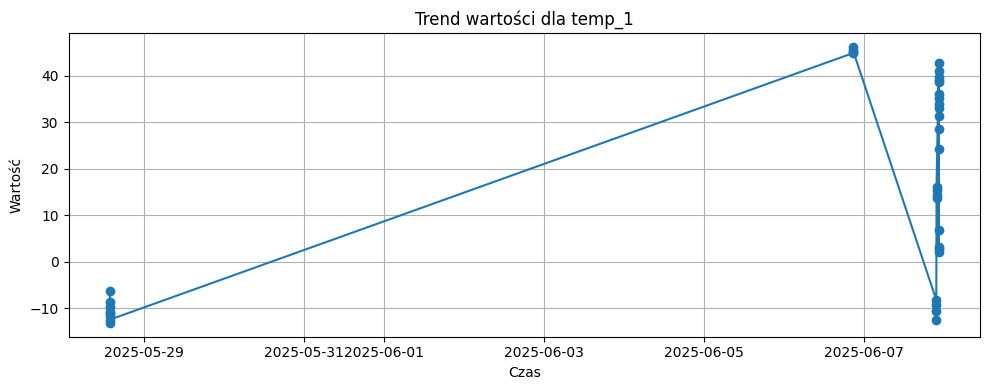

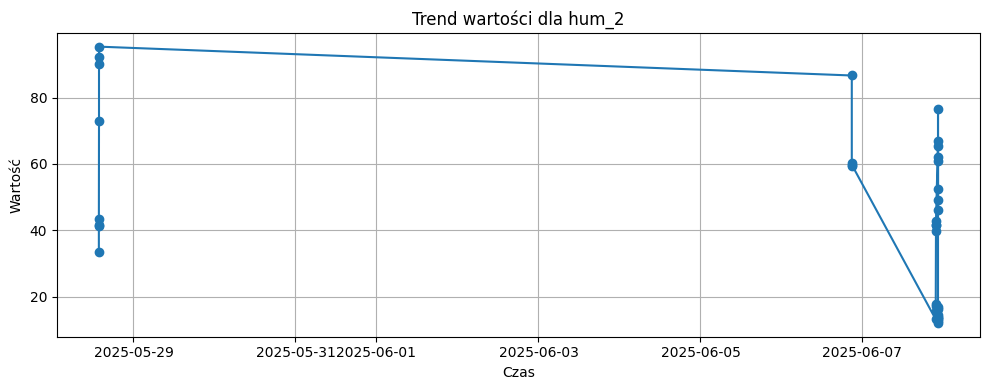

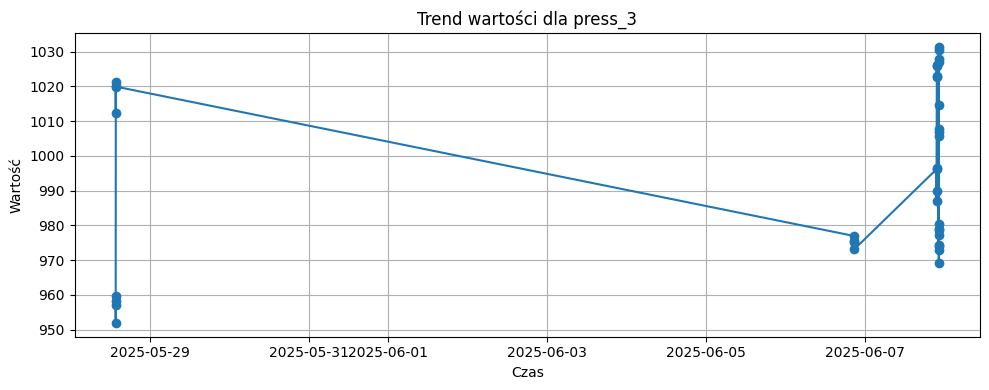

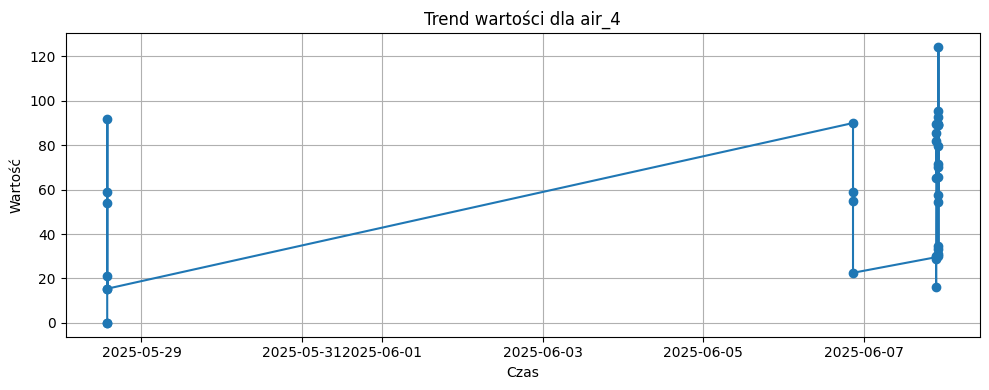

In [7]:
for sensor_id in data['sensor_id'].unique():
    subset = data[data['sensor_id'] == sensor_id]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['timestamp'], subset['value'], marker='o')
    plt.title(f'Trend wartości dla {sensor_id}')
    plt.xlabel('Czas')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 📊 Histogramy wartości

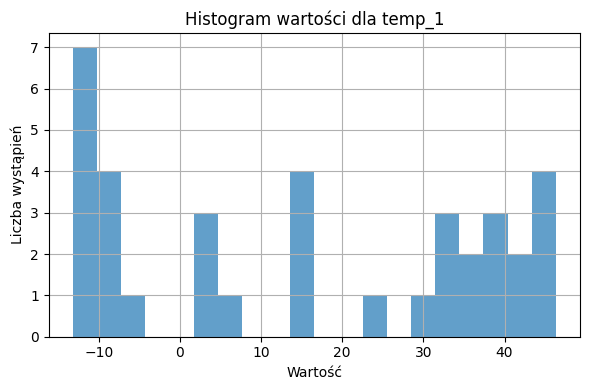

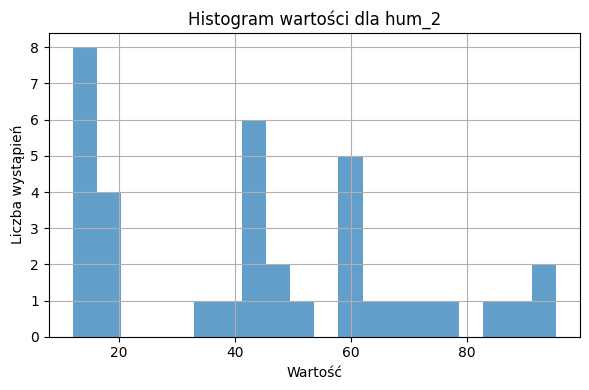

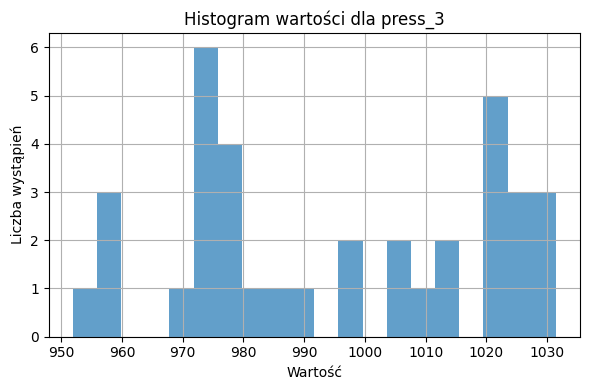

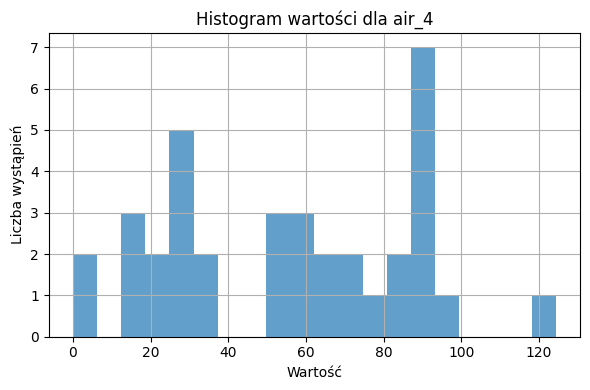

In [8]:
for sensor_id in data['sensor_id'].unique():
    subset = data[data['sensor_id'] == sensor_id]
    plt.figure(figsize=(6, 4))
    plt.hist(subset['value'], bins=20, alpha=0.7)
    plt.title(f'Histogram wartości dla {sensor_id}')
    plt.xlabel('Wartość')
    plt.ylabel('Liczba wystąpień')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 📏 Średnie kroczące (1h, 12h)

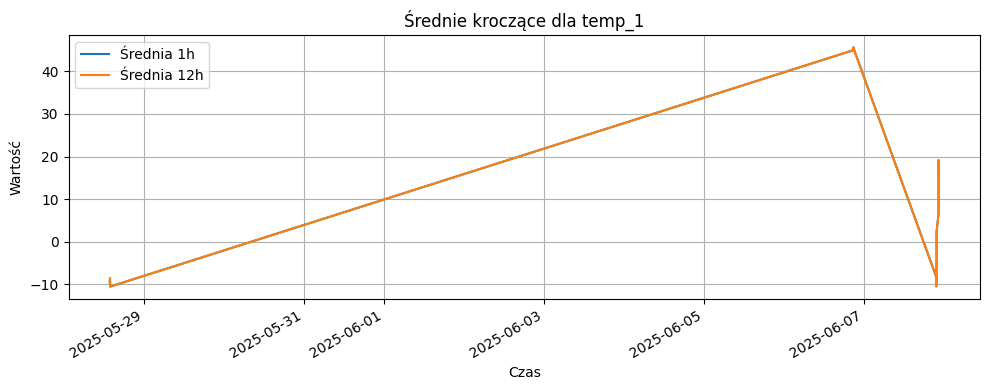

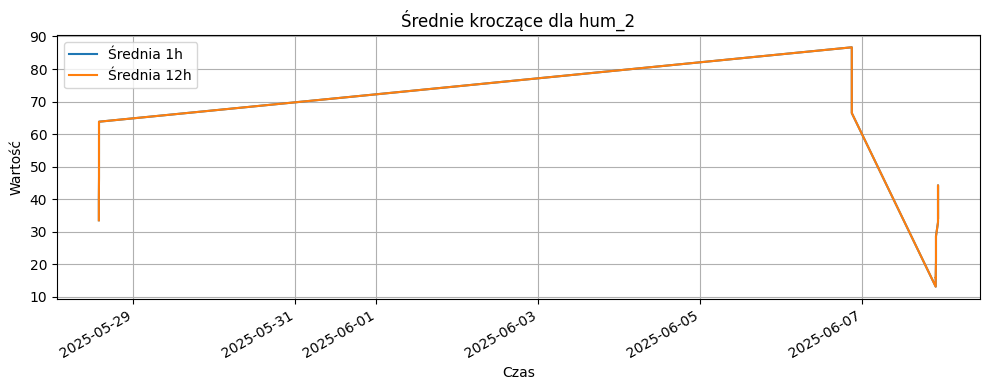

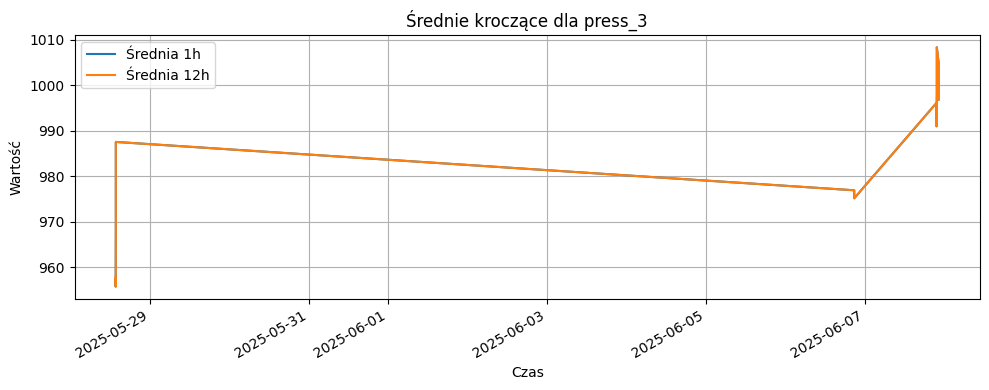

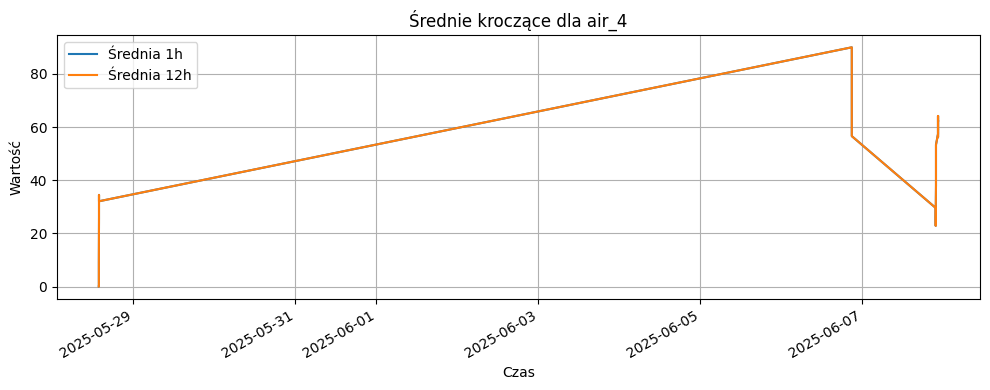

In [9]:
data = data.sort_values('timestamp')
data.set_index('timestamp', inplace=True)

for sensor_id in data['sensor_id'].unique():
    subset = data[data['sensor_id'] == sensor_id]
    plt.figure(figsize=(10, 4))
    subset['value'].rolling('1h').mean().plot(label='Średnia 1h')
    subset['value'].rolling('12h').mean().plot(label='Średnia 12h')
    plt.title(f'Średnie kroczące dla {sensor_id}')
    plt.xlabel('Czas')
    plt.ylabel('Wartość')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()